In [46]:
\l signal.q
\l funcs.q
\l graphics.q
plt:.p.import`matplotlib.pyplot
np:.p.import`numpy
itertools:.p.import`itertools
mdates:.p.import[`matplotlib;`:dates]

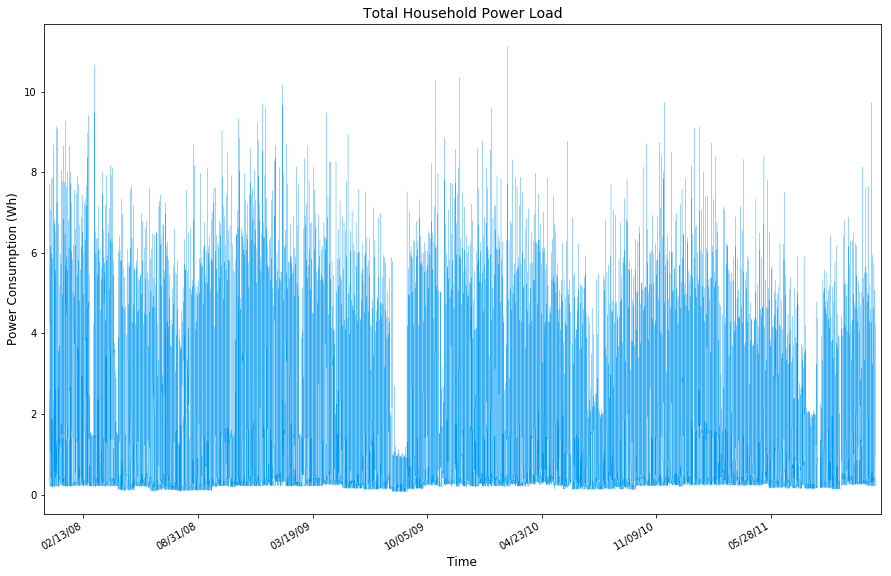

In [49]:
\z 1
household:select Time:Date+Time,Power:fills Global_active_power from ("DTF      "; enlist ";") 0:`:household_power_consumption.txt
x:`date$household`Time;
y:household`Power;

plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][x;y;`color pykw "xkcd:azure";`linewidth pykw 0.2];
ax[`:xaxis.set_major_formatter][mdates[`:DateFormatter]["%D"]];
fig[`:autofmt_xdate][];
fig[`:set_figheight]10;
fig[`:set_figwidth]15;
plt[`:xlim][((first x)-10);((last x)+10)];
ax[`:set_xlabel]["Time";`fontsize pykw 12];
ax[`:set_ylabel]["Power Consumption (Wh)";`fontsize pykw 12];
ax[`:set_title]["Total Household Power Load";`fontsize pykw 14];
plt[`:show][];


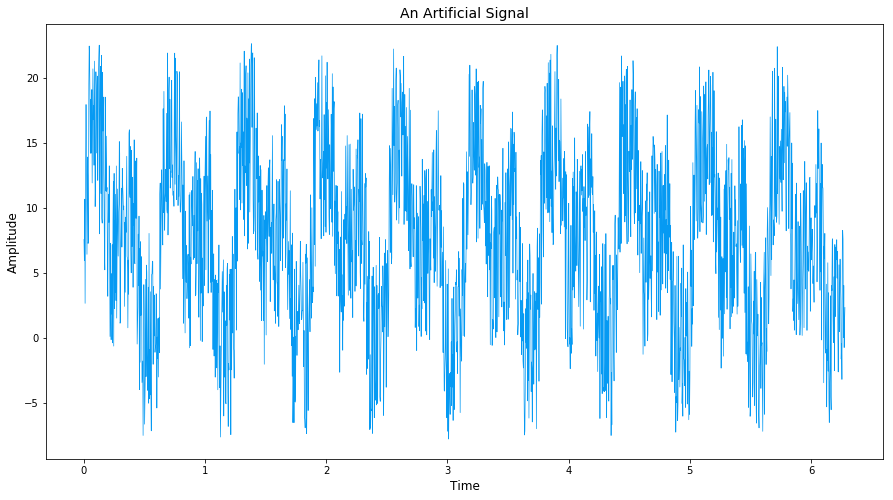

In [23]:
x:(2*.signal.PI*(1%2048)) * til 2048;
y:(5 * sin (20*x))+(5 * sin (10 * x)) + (2 * sin (50 * x))+ `float$({first 1?15.0} each x);
plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][x;y;`color pykw "xkcd:azure";`linewidth pykw 0.7];
fig[`:set_figheight]8;
fig[`:set_figwidth]15;
ax[`:set_xlabel]["Time";`fontsize pykw 12];
ax[`:set_ylabel]["Amplitude";`fontsize pykw 12];
ax[`:set_title]["An Artificial Signal";`fontsize pykw 14];
plt[`:show][];

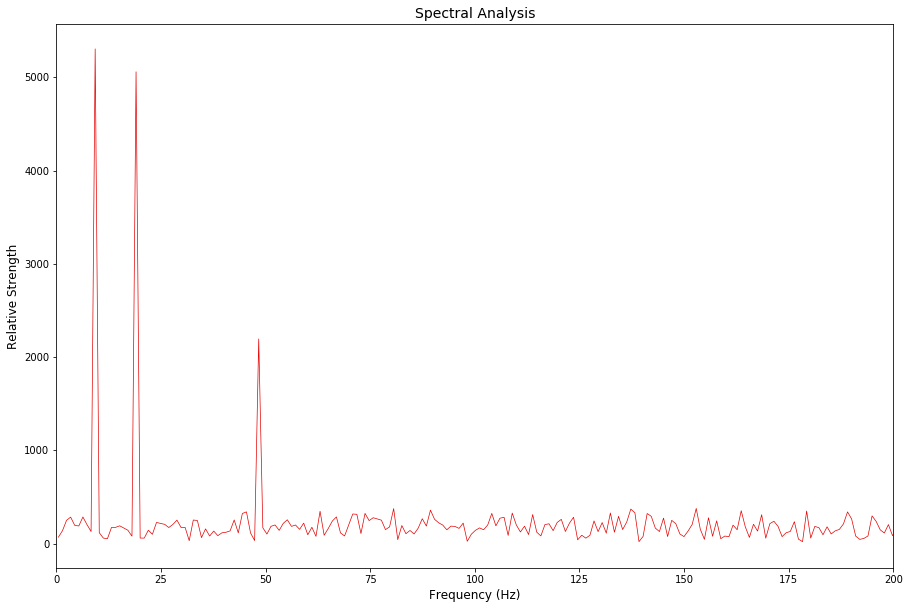

In [22]:
x:(2*.signal.PI*(1%2048)) * til 2048;
y:(5 * sin (20*x))+(5 * sin (10 * x)) + (2 * sin (50 * x))+ `float$({first 1?15.0} each x);
f:([]freq:20 * neg 1024#{[Ns;fs] (neg fs*0.5)+(fs%(Ns-1))*til Ns}[2048;100];magnitude:-1024#.signal.mag .signal.fftrad2[(y;2048#0f)]);
plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][f`freq;f`magnitude;`color pykw "xkcd:red";`linewidth pykw 0.7];
fig[`:set_figheight]10;
fig[`:set_figwidth]15;
plt[`:xlim][0;200];
ax[`:set_xlabel]["Frequency (Hz)";`fontsize pykw 12];
ax[`:set_ylabel]["Relative Strength";`fontsize pykw 12];
ax[`:set_title]["Spectral Analysis";`fontsize pykw 14];
plt[`:show][];

{[f;x]embedPy[f;x]}[foreign]enlist


{[f;x]embedPy[f;x]}[foreign]enlist


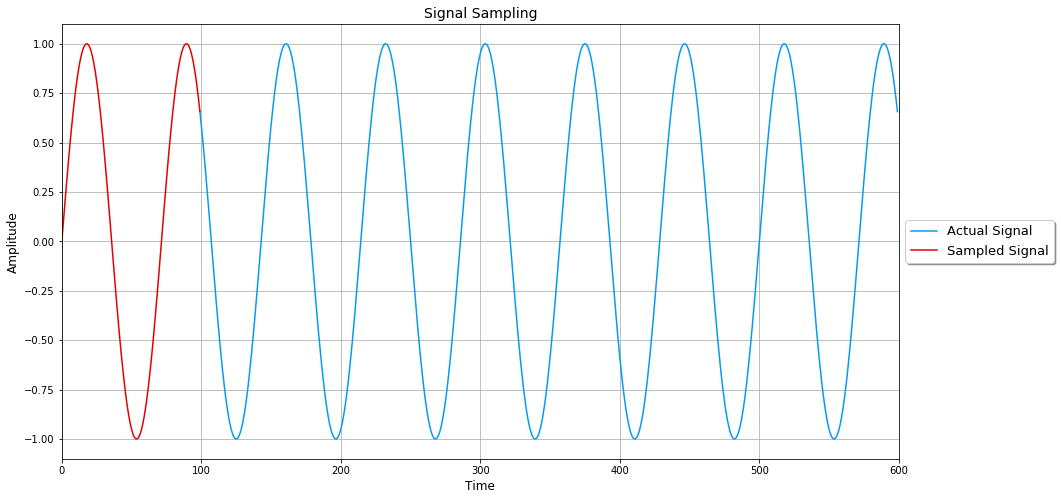

{[f;x]embedPy[f;x]}[foreign]enlist


In [26]:
/cont:([]x:til 600;y:sin ((2.8*pi%100) *til 600))

/samp:([]x:til 100;y:sin (2.8 * pi%100) * til 100)
plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][99 + til 501;sin ((2.8*PI%100) *(99 + til 501));`color pykw "xkcd:azure";`label pykw"Actual Signal"]
ax[`:plot][til 100;sin ((2.8*PI%100) *(til 100));`color pykw "xkcd:red";`label pykw"Sampled Signal"]
fig[`:set_figheight]8;
fig[`:set_figwidth]15;
plt[`:xlim][0;600];
ax[`:legend][`loc pykw"center left";`shadow pykw 1b;`bbox_to_anchor pykw(1,0.5);`fontsize pykw 13];
ax[`:set_xlabel]["Time";`fontsize pykw 12];
ax[`:set_ylabel]["Amplitude";`fontsize pykw 12];
ax[`:set_title]["Signal Sampling";`fontsize pykw 14];
plt[`:grid] 1;
plt[`:show][]

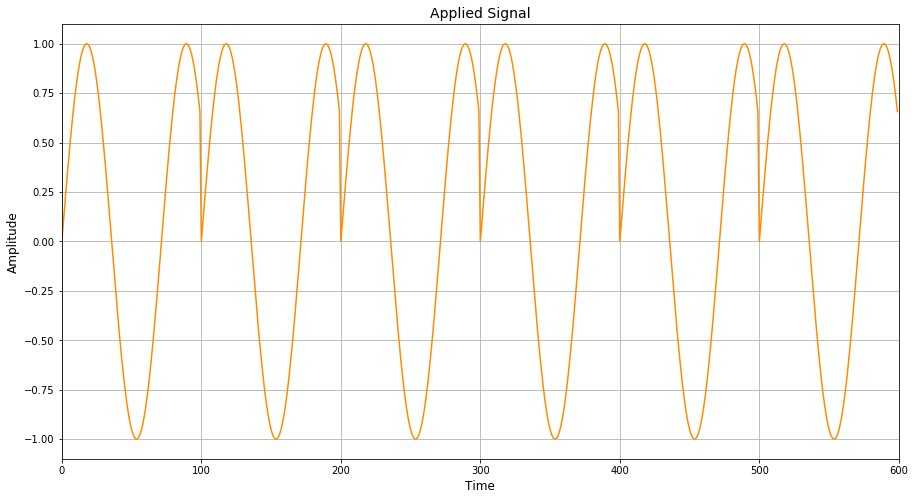

{[f;x]embedPy[f;x]}[foreign]enlist


In [27]:
x:(2.8 * .signal.PI%100) * til 100
discont:([]x:til 600;y:sin (x,x,x,x,x,x))
plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][discont`x;discont`y;`color pykw "darkorange"];
fig[`:set_figheight]8;
fig[`:set_figwidth]15;
plt[`:xlim][0;600];
ax[`:set_xlabel]["Time";`fontsize pykw 12];
ax[`:set_ylabel]["Amplitude";`fontsize pykw 12];
ax[`:set_title]["Applied Signal";`fontsize pykw 14];
plt[`:grid] 1;
plt[`:show][]

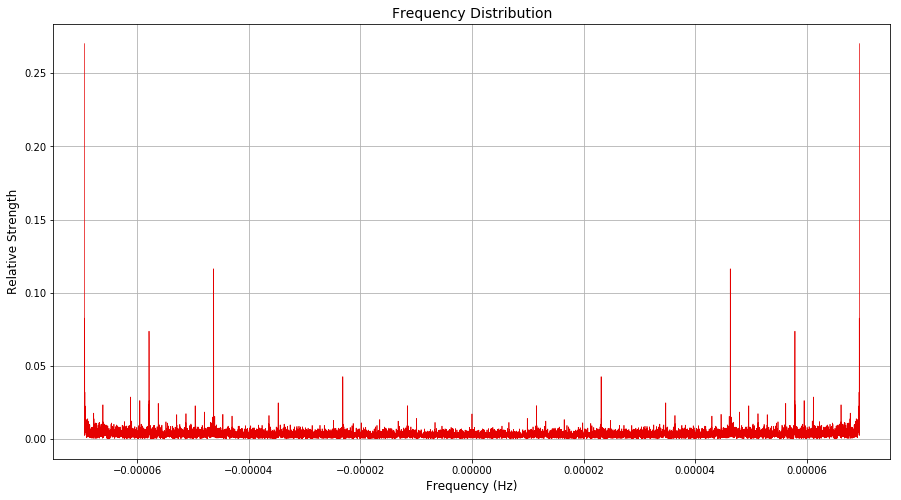

{[f;x]embedPy[f;x]}[foreign]enlist


In [39]:
household2hour:select from household where 0=(i mod 120);
n:count household2hour;
cn:`int$2 xexp (count 2 vs n)-1;
spec:spectral[(cn sublist household2hour`Power;cn#0f);1%(120*60)];
plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][1_spec`freq;1_spec`magnitude;`color pykw "xkcd:red";`linewidth pykw 0.7];
fig[`:set_figheight]8;
fig[`:set_figwidth]15;
plt[`:xlim][-0.000075;0.000075];
ax[`:set_xlabel]["Frequency (Hz)";`fontsize pykw 12];
ax[`:set_ylabel]["Relative Strength";`fontsize pykw 12];
ax[`:set_title]["Frequency Distribution";`fontsize pykw 14];
plt[`:grid] 1;
plt[`:show][]


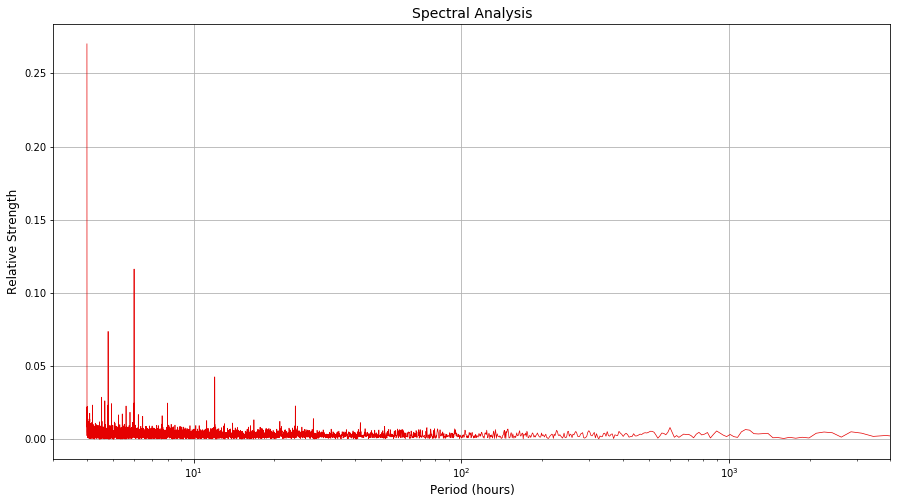

In [45]:
household2hour:select from household where 0=(i mod 120);
n:count household2hour;
cn:`int$2 xexp (count 2 vs n)-1;
spec:spectral[(cn sublist household2hour`Power;cn#0f);1%(120*60)];
specReal:select period:neg (1%freq)%3600, magnitude from ((cn div 2) sublist spec);
plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][1_specReal`period;1_specReal`magnitude;`color pykw "xkcd:red";`linewidth pykw 0.7];
fig[`:set_figheight]8;
fig[`:set_figwidth]15;
plt[`:xlim][3;4000];
ax[`:set_xscale]["log"];
ax[`:set_xlabel]["Period (hours)";`fontsize pykw 12];
ax[`:set_ylabel]["Relative Strength";`fontsize pykw 12];
ax[`:set_title]["Spectral Analysis";`fontsize pykw 14];
plt[`:grid] 1;

plt[`:show][];

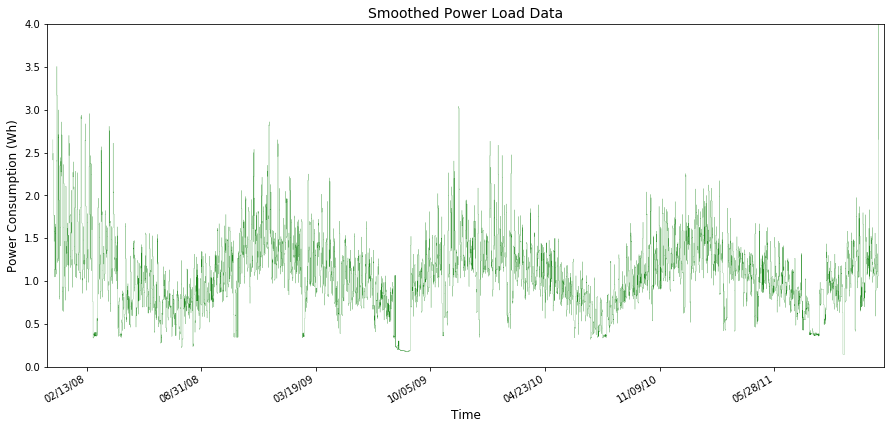

In [58]:
smoothed:select `date$Time, Power: .signal.movAvg[Power;24*60] from household;


plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][smoothed`Time;smoothed`Power;`color pykw "forestgreen";`linewidth pykw 0.2];
ax[`:xaxis.set_major_formatter][mdates[`:DateFormatter]["%D"]];
fig[`:autofmt_xdate][];
fig[`:set_figheight]7;
fig[`:set_figwidth]15;
plt[`:xlim][((first x)-10);((last x)+10)];
plt[`:ylim][0;4];
ax[`:set_xlabel]["Time";`fontsize pykw 12];
ax[`:set_ylabel]["Power Consumption (Wh)";`fontsize pykw 12];
ax[`:set_title]["Smoothed Power Load Data";`fontsize pykw 14];
plt[`:show][];

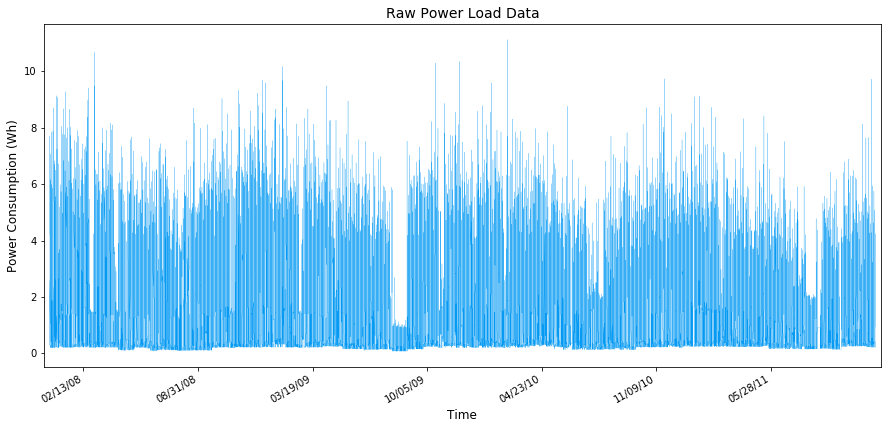

In [59]:
\z 1
household:select Time:Date+Time,Power:fills Global_active_power from ("DTF      "; enlist ";") 0:`:household_power_consumption.txt
x:`date$household`Time;
y:household`Power;

plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][x;y;`color pykw "xkcd:azure";`linewidth pykw 0.2];
ax[`:xaxis.set_major_formatter][mdates[`:DateFormatter]["%D"]];
fig[`:autofmt_xdate][];
fig[`:set_figheight]7;
fig[`:set_figwidth]15;
plt[`:xlim][((first x)-10);((last x)+10)];
ax[`:set_xlabel]["Time";`fontsize pykw 12];
ax[`:set_ylabel]["Power Consumption (Wh)";`fontsize pykw 12];
ax[`:set_title]["Raw Power Load Data";`fontsize pykw 14];
plt[`:show][];

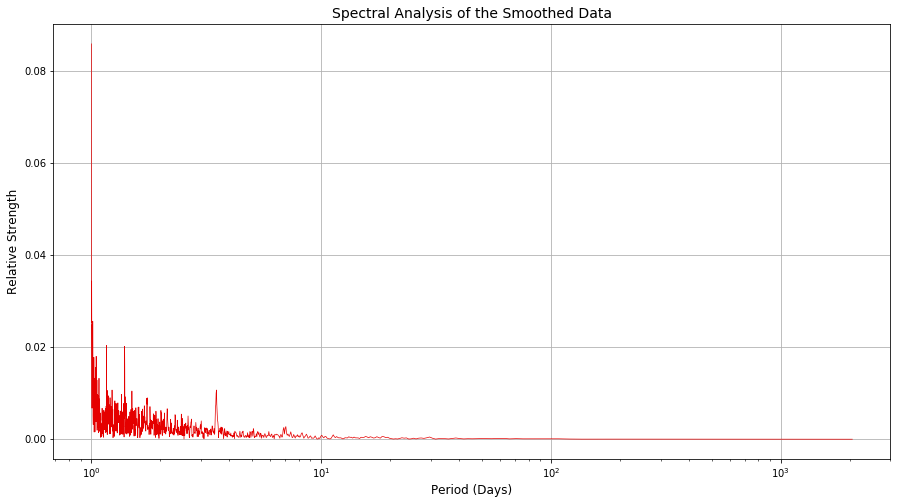

In [69]:
specMA:spectral2[householdMA;`Time;`Power;60*12;`period];
update period:period % 24 from `specMA;
plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][3_specMA`period;3_specMA`magnitude;`color pykw "xkcd:red";`linewidth pykw 0.7];
fig[`:set_figheight]8;
fig[`:set_figwidth]15;

ax[`:set_xscale]["log"];
ax[`:set_xlabel]["Period (Days)";`fontsize pykw 12];
ax[`:set_ylabel]["Relative Strength";`fontsize pykw 12];
ax[`:set_title]["Spectral Analysis of the Smoothed Data";`fontsize pykw 14];
plt[`:grid] 1;

plt[`:show][];

`household


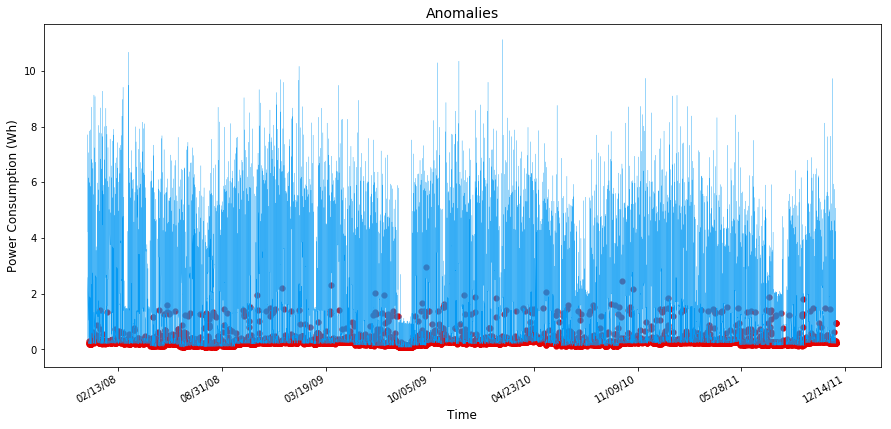

In [91]:
sigma:2;
ln:5;
update `date$Time from `household
outlier:update out:?[((Power > (.signal.movAvg[Power;ln] + (fills sigma * .signal.movDev[Power;ln])))|Power < ((.signal.movAvg[Power;ln] - (fills sigma * .signal.movDev[Power;ln]))));Power;0n] from household;
outs:select Time, out from outlier where not out=0n;
plot:plt[`:subplots][];
fig:plot[@;0];
ax:plot[@;1];
ax[`:plot][outlier`Time;outlier`Power;`color pykw "xkcd:azure";`linewidth pykw 0.2];
ax[`:scatter][outs`Time;outs`out;`color pykw "xkcd:red";`linewidth pykw 0.2];
ax[`:xaxis.set_major_formatter][mdates[`:DateFormatter]["%D"]];
fig[`:autofmt_xdate][];
fig[`:set_figheight]7;
fig[`:set_figwidth]15;
/plt[`:xlim][(outliers`Time) 1074636;(outliers`Time) 1600236];
ax[`:set_xlabel]["Time";`fontsize pykw 12];
ax[`:set_ylabel]["Power Consumption (Wh)";`fontsize pykw 12];
ax[`:set_title]["Anomalies";`fontsize pykw 14];
plt[`:show][];